In [1]:
words = open('names_es_ar.txt').read().splitlines()

In [2]:
chars = sorted(list(set("".join(words))))
n = len(chars)
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [3]:
import torch
import torch.nn.functional as F


In [4]:
N = torch.zeros((n + 1, n + 1), dtype=torch.int32)

for w in words[:]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

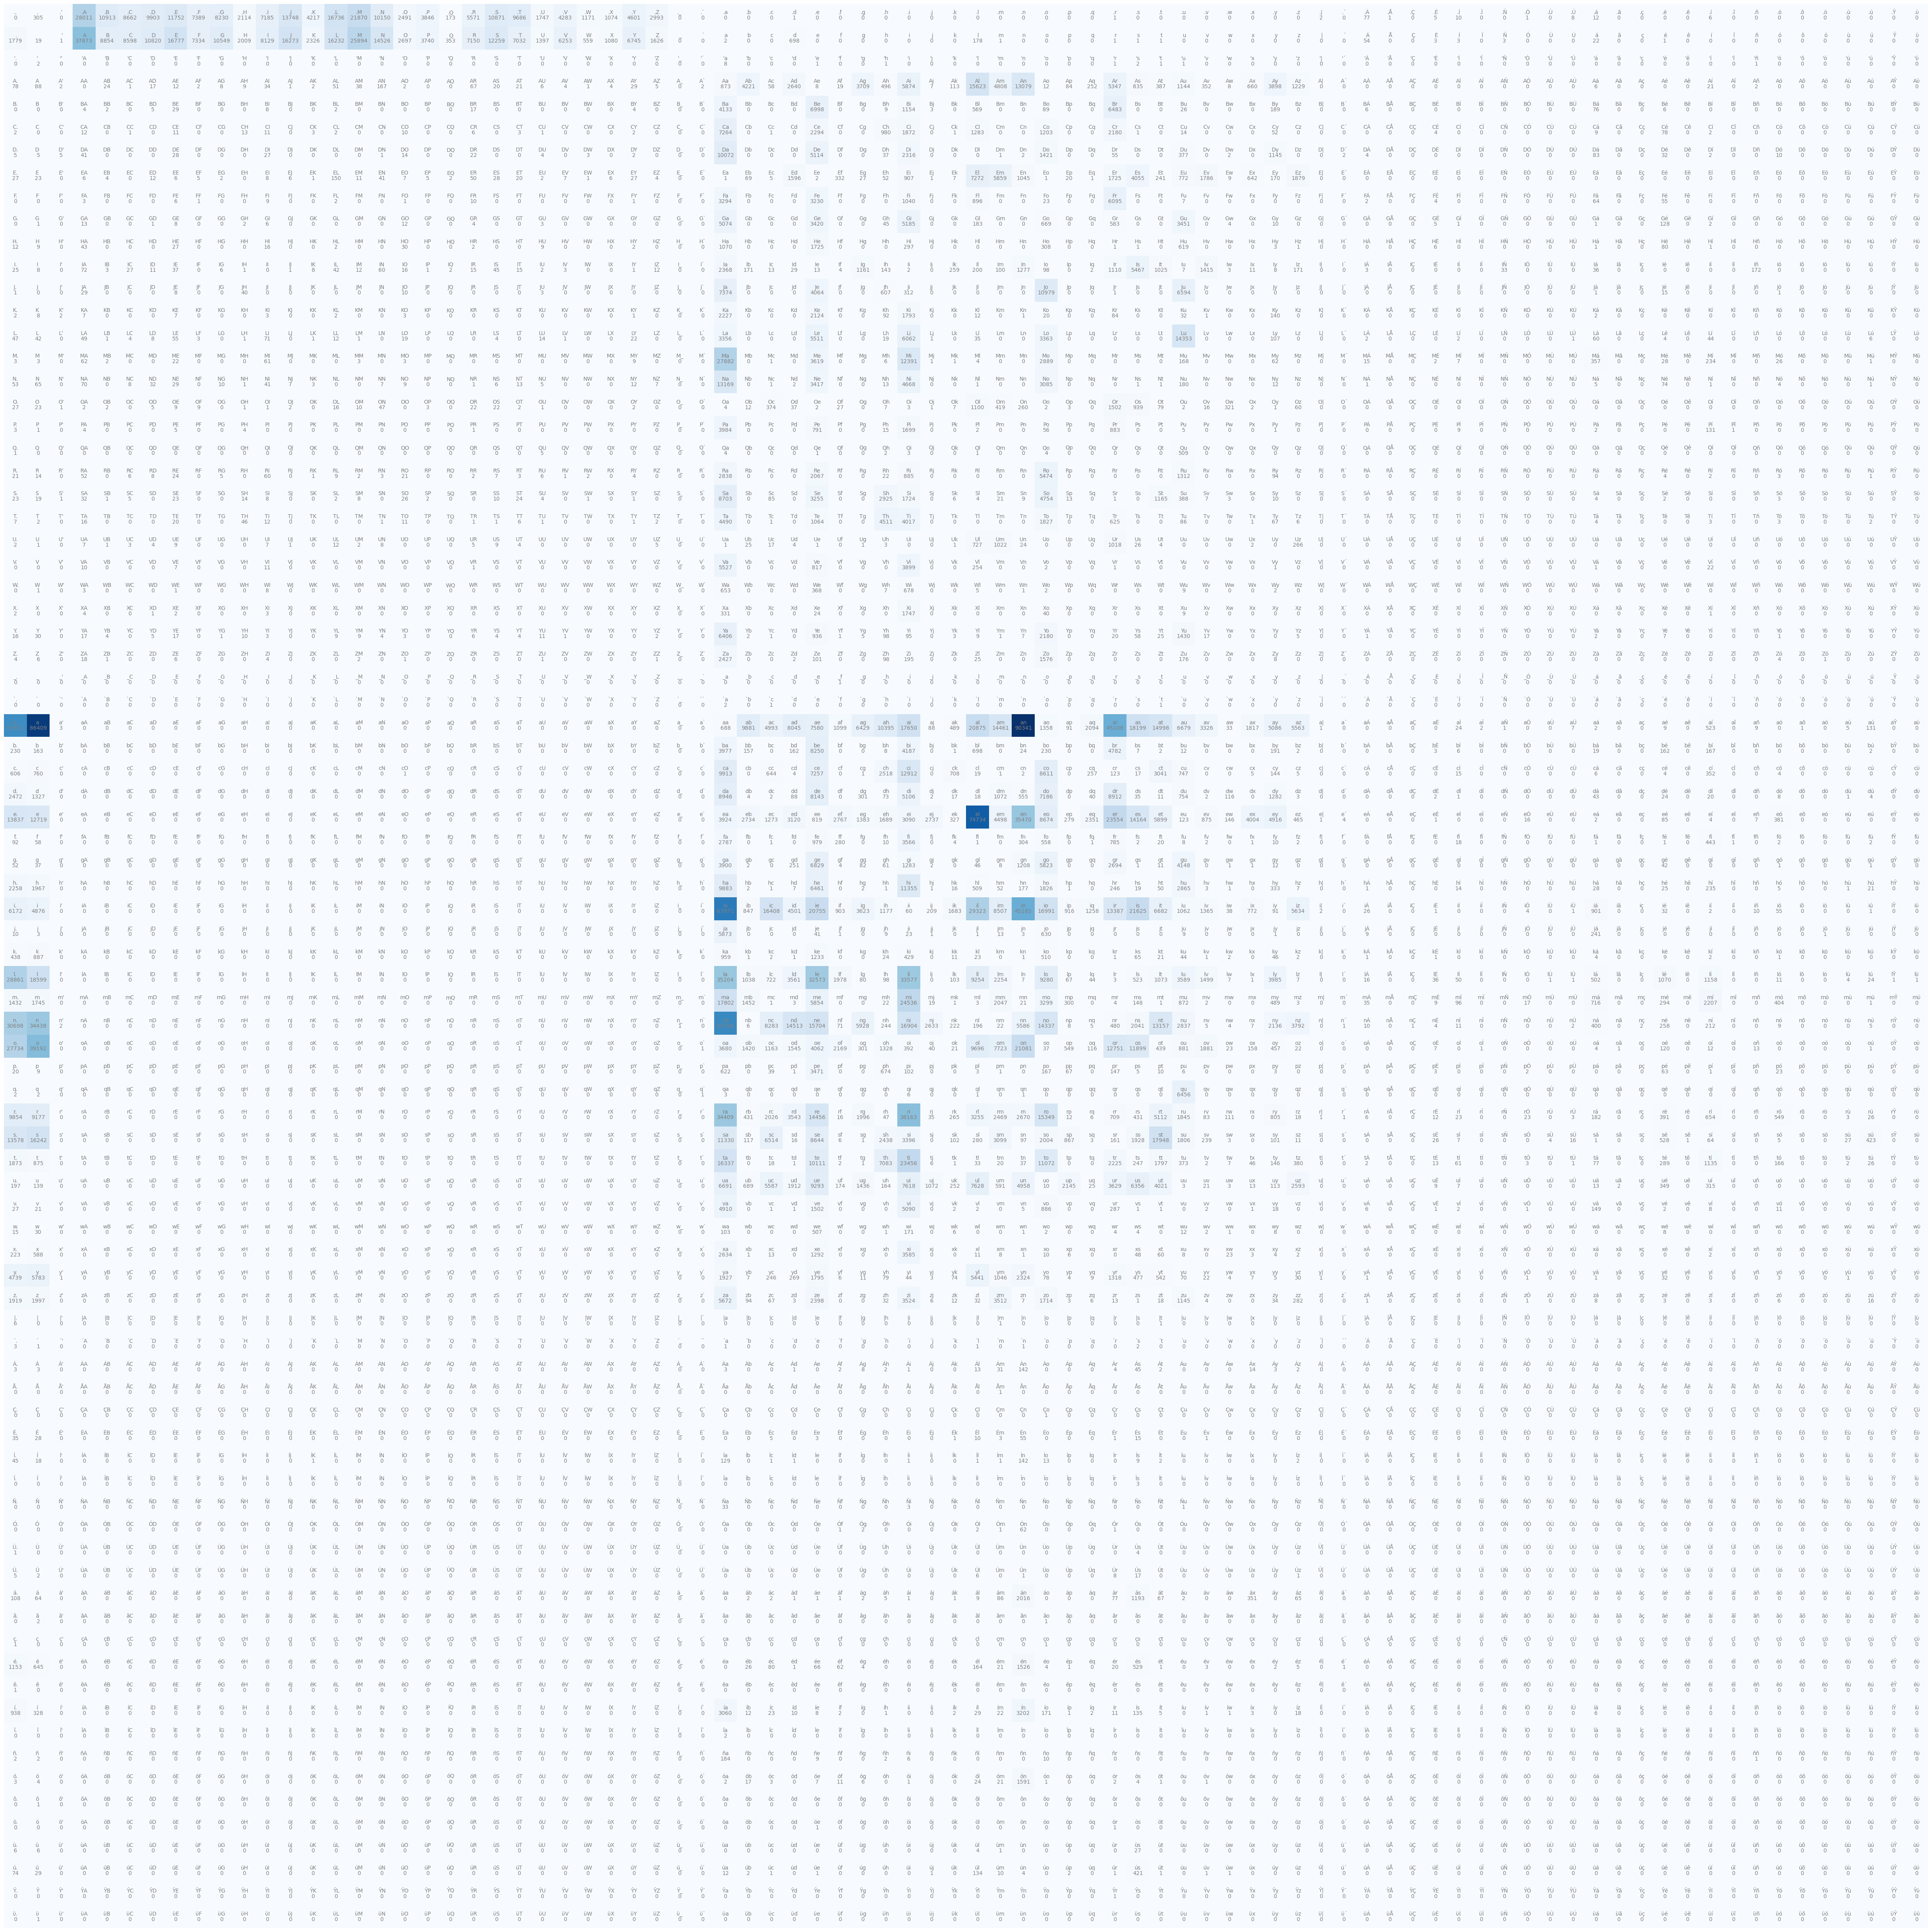

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(64,64))
plt.imshow(N, cmap='Blues')
for i in range(n+1):
    for j in range(n+1):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.show()

In [6]:
N.shape

torch.Size([84, 84])

In [7]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 1.4537e-03, 0.0000e+00, 1.3350e-01, 5.2012e-02, 4.1284e-02,
        4.7198e-02, 5.6011e-02, 3.5217e-02, 3.9225e-02, 1.0075e-02, 3.4244e-02,
        6.5524e-02, 2.0099e-02, 7.9765e-02, 1.0423e-01, 4.8376e-02, 1.1872e-02,
        1.8330e-02, 8.2453e-04, 2.6552e-02, 5.1812e-02, 4.6164e-02, 8.3263e-03,
        2.0413e-02, 5.5811e-03, 5.1188e-03, 2.1929e-02, 1.4265e-02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.7661e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.7661e-06, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 9.5322e-06, 0.0000e+00, 3.6699e-04,
        4.7661e-06, 0.0000e+00, 2.3830e-05, 4.7661e-05, 0.0000e+00, 0.0000e+00,
        4.7661e-06, 0.0000e+00, 3.8129e-05, 5.7193e-05, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.8596e-

In [8]:
p.sum()

tensor(1.)

In [9]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
# ix
itos[ix]

'A'

In [10]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [11]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [12]:
P = (N).float()
P /= P.sum(dim=1, keepdim=True)
P

tensor([[0.0000e+00, 1.4537e-03, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [7.4171e-03, 7.9216e-05, 4.1692e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.1111e-01, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.0647e-01, 4.1727e-02, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [13]:
p = N[0].float()
p = p / p.sum()
p
P = p

In [14]:
# Smoothing
P = (N + 1 ).float()
P /= P.sum(dim=1, keepdim=True)
P

tensor([[4.7642e-06, 1.4578e-03, 4.7642e-06,  ..., 4.7642e-06, 4.7642e-06,
         4.7642e-06],
        [7.4186e-03, 8.3356e-05, 8.3356e-06,  ..., 4.1678e-06, 4.1678e-06,
         4.1678e-06],
        [9.8039e-03, 2.9412e-02, 9.8039e-03,  ..., 9.8039e-03, 9.8039e-03,
         9.8039e-03],
        ...,
        [9.6277e-02, 3.8511e-02, 1.2837e-03,  ..., 1.2837e-03, 1.2837e-03,
         1.2837e-03],
        [1.1765e-02, 1.1765e-02, 1.1765e-02,  ..., 1.1765e-02, 1.1765e-02,
         1.1765e-02],
        [1.1765e-02, 2.3529e-02, 1.1765e-02,  ..., 1.1765e-02, 1.1765e-02,
         1.1765e-02]])

In [15]:
ix = 0

for i in range(10):
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        print(itos[ix], end="")
    print()


De
Ma Lio
Zugrol Dy
Jo
Guiaiurto
Amier
Amaical
Aliaguelileos
Pariles Is Ara Erivil Amíseosta
By


In [16]:
P[0].sum()

tensor(1.)

In [17]:
# log(a*b*c) = log(a) + log(b) + log(c) 

In [18]:
log_likelihood = 0.0
n = 0
for w in words[:]:
#for w in [ "xxxxxxxx"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        log_likelihood += torch.log(P[ix1, ix2])
        n += 1

nll = -log_likelihood
print(f"{log_likelihood=}")
print(f"{nll=}")
print(f"{nll/n=}")

log_likelihood=tensor(-7389134.5000)
nll=tensor(7389134.5000)
nll/n=tensor(2.3179)


In [19]:
# goal maximize log likelihood
# goal minimize negative log likelihood
# goal minimize perplexity